<a href="https://colab.research.google.com/github/HMR1998/HeightWeightPrediction/blob/main/Height_Weight_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install binsreg

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from binsreg import binsreg

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/HeightWeight.csv')
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [10]:
df.shape

(25000, 3)

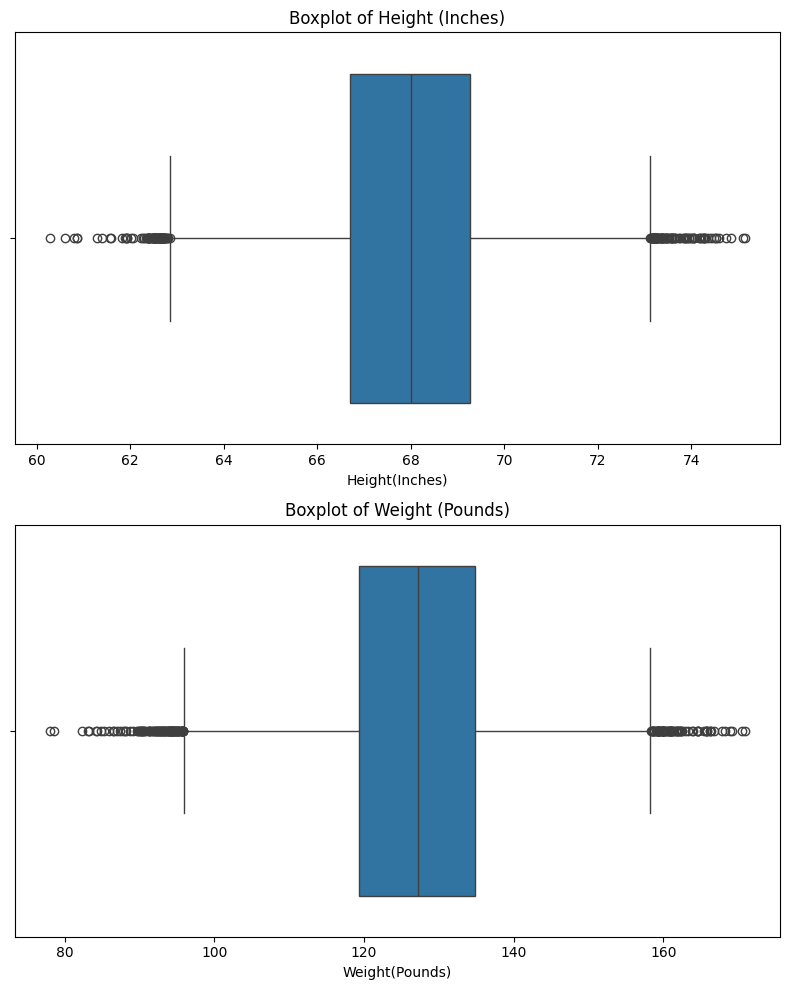

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.boxplot(data=df, x='Height(Inches)', ax=axes[0])
axes[0].set_title('Boxplot of Height (Inches)')

sns.boxplot(data=df, x='Weight(Pounds)', ax=axes[1])
axes[1].set_title('Boxplot of Weight (Pounds)')

plt.tight_layout()
plt.show()

In [12]:
w_mean = df['Weight(Pounds)'].mean()
w_std = df['Weight(Pounds)'].std()
h_mean = df['Height(Inches)'].mean()
h_std = df['Height(Inches)'].std()

lower_cut_weight = w_mean - 2 * w_std
upper_cut_weight = w_mean + 2 * w_std
lower_cut_height = h_mean - 2 * h_std
upper_cut_height = h_mean + 2 * h_std

df = df[(df['Weight(Pounds)'] > lower_cut_weight) & (df['Weight(Pounds)'] < upper_cut_weight) &
              (df['Height(Inches)'] > lower_cut_height) & (df['Height(Inches)'] < upper_cut_height)]
df.shape

(22883, 3)

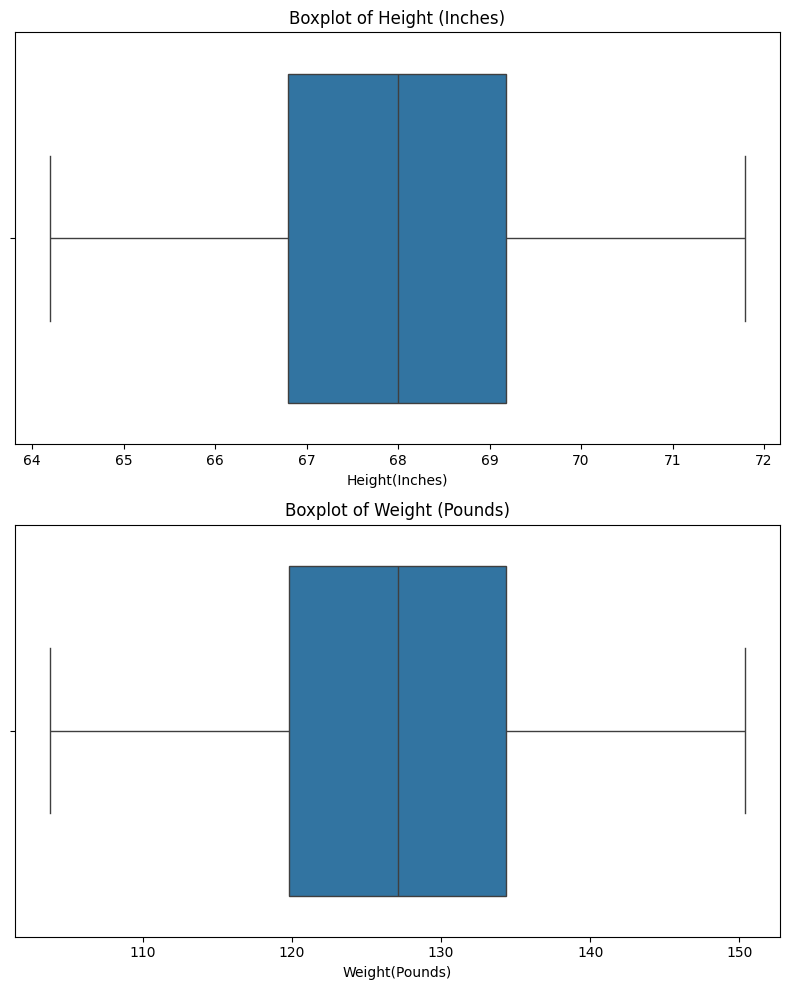

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.boxplot(data=df, x='Height(Inches)', ax=axes[0])
axes[0].set_title('Boxplot of Height (Inches)')

sns.boxplot(data=df, x='Weight(Pounds)', ax=axes[1])
axes[1].set_title('Boxplot of Weight (Pounds)')

plt.tight_layout()
plt.show()

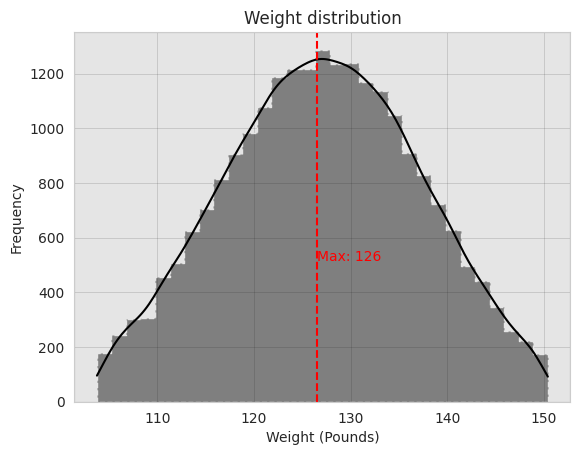

In [14]:
counts, bins = np.histogram(df['Weight(Pounds)'], bins=80)
max_count_index = counts.argmax()
max_bin = bins[max_count_index]

sns.set_palette('deep')
sns.set_style('whitegrid')
hist = sns.histplot(data=df, x='Weight(Pounds)', bins=80, binwidth=1.5, linestyle='dashed',
             color='black', element='step', edgecolor='white', kde=True)

plt.gca().add_patch(plt.Rectangle((plt.xlim()[0], 0), # Where the background will start - bottom left corner
                                  plt.xlim()[1] - plt.xlim()[0], # Specifies the width of the background - spans the entire x axis
                                  plt.ylim()[1], # specifies the height of the background - spans the entire y axis
                                  fill=True, alpha=0.2, color='grey'))

hist.axvline(max_bin, color='red', linestyle='--')
hist.text(max_bin, max(counts), f'Max: {int(max_bin)}', color='red', ha='left')

plt.grid(color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))

plt.title('Weight distribution')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Frequency')


plt.show()

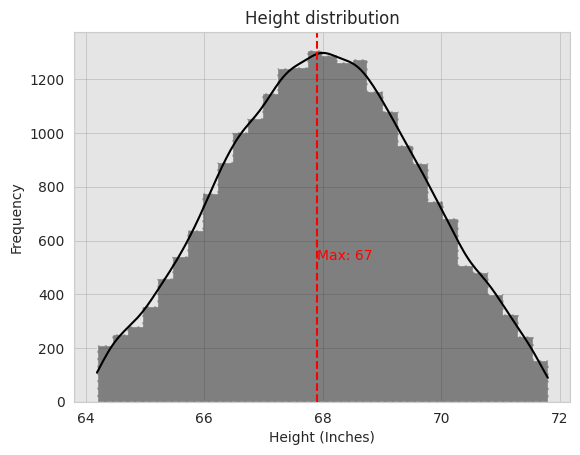

In [15]:
counts, bins = np.histogram(df['Height(Inches)'], bins=80)
max_count_index = counts.argmax()
max_bin = bins[max_count_index]

sns.set_palette('deep')
sns.set_style('whitegrid')
hist = sns.histplot(data=df, x='Height(Inches)', bins=80, binwidth=0.25, linestyle='dashed',
             color='black', element='step', edgecolor='white', kde=True)

plt.gca().add_patch(plt.Rectangle((plt.xlim()[0], 0), # Where the background will start - bottom left corner
                                  plt.xlim()[1] - plt.xlim()[0], # Specifies the width of the background - spans the entire x axis
                                  plt.ylim()[1], # specifies the height of the background - spans the entire y axis
                                  fill=True, alpha=0.2, color='grey'))

hist.axvline(max_bin, color='red', linestyle='--')
hist.text(max_bin, max(counts), f'Max: {int(max_bin)}', color='red', ha='left')

plt.grid(color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.title('Height distribution')
plt.xlabel('Height (Inches)')
plt.ylabel('Frequency')


plt.show()

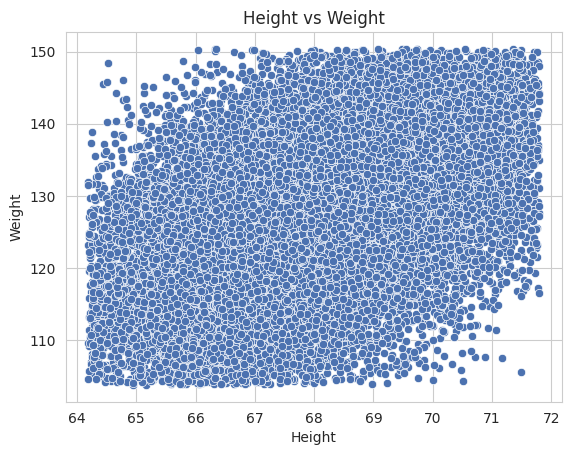

In [16]:
sns.scatterplot(data=df, x='Height(Inches)', y='Weight(Pounds)')

plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

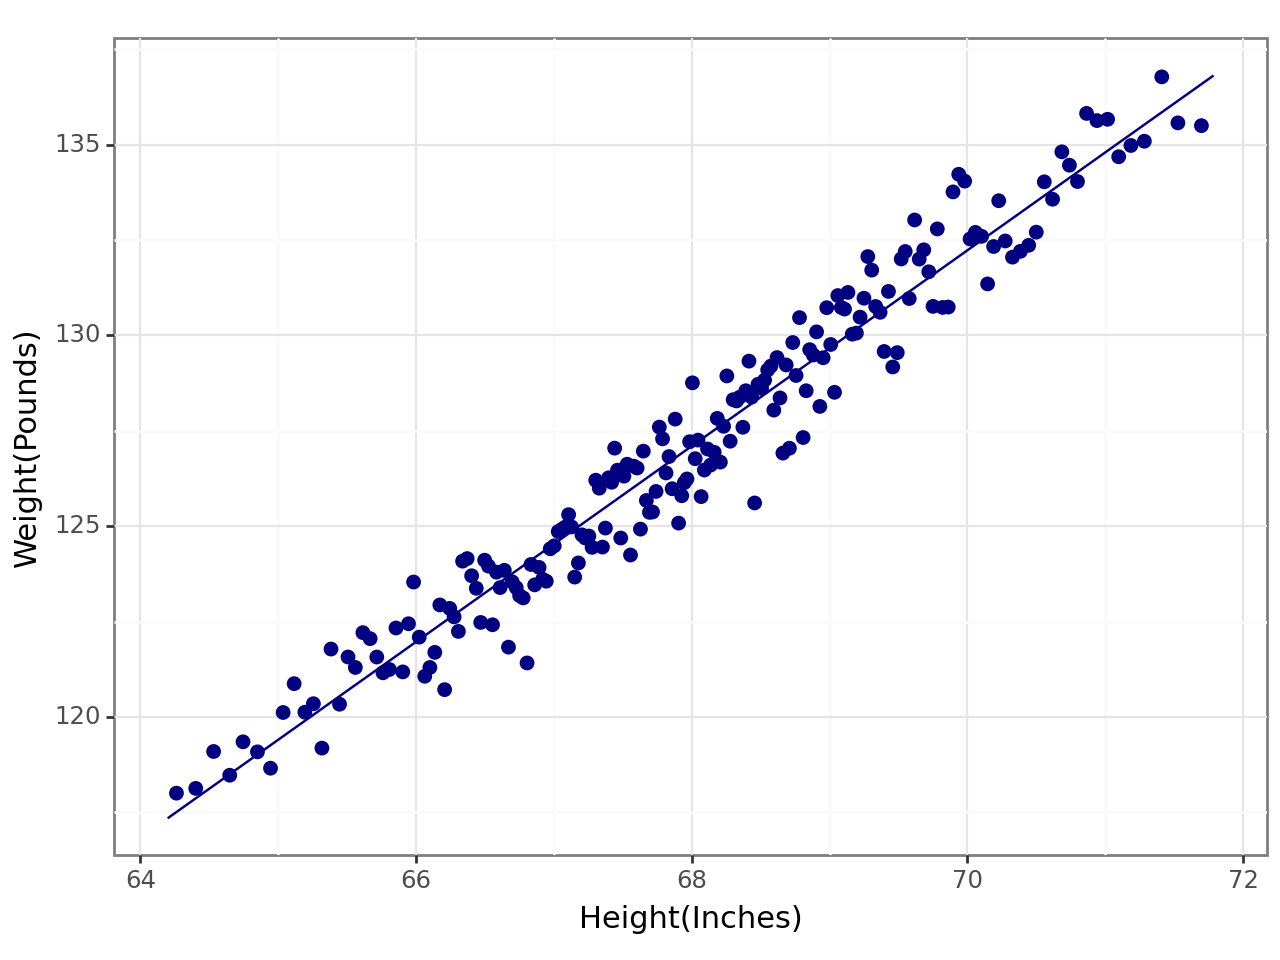

In [17]:
est = binsreg(data=df, x='Height(Inches)', y='Weight(Pounds)', nbins=200, polyreg=1)

In [23]:
df.to_csv('model_dataset', index=False)

In [32]:
import os
os.makedirs('/content/drive/MyDrive/Datasets/height_weight')
df.to_csv('/content/drive/MyDrive/Datasets/height_weight/model_data', index=False)